# Comparing Ethereum with the rest of the world 
####  Understanding and predicting the cryptocurrency evolution 

## Background 

Ethereum is the second most popular cryptocurreny after the Bitcoin. Predicting as becoming the leader in the market soon, it has gain a lot of attention in the past months. But while some find it as another opportunity to invest in this generalized trend that is the blockchain technology, others see it as a more sophisticated version of its predecessor. The reason why leads in the general use of this technolgoies: Bitcoin is a currency and Ethereum is "a ledger technology that companies are using to build new programs" (source: https://hackernoon.com/the-primary-difference-between-ethereum-and-bitcoin-a-beginners-guide-8a892afb7a4). In addition of feeding the aspirations ot a bunch of geeks, Ethereum draw the attention of a group called 'The Enterprise Ethereum Alliance', which is super-group of "Fortune 500 companies that have all agreed to work together to learn and build upon Ethereum’s blockchain technology — otherwise referred to as “smart contract” technology".

## Hypothesis 

The Ethereum value can be predicted with historical values, other cryptocurrencies'indexes or other markets 



## Approach

- This project will require a large part of research, especially in the Bitcoin field 
- It will focus on time-series analysis at the beginning but hopefully can expand the analysis to a broader range of analysis if possible 
- Ethereum Data come from http://coinmarketcap.com, which is a key resource for the crypto values 
- After choosing at least three different approaches for predicting the Ethereum price, I will analyze those and compare their accuracy

## Previous analysis made (and sources)



#### 1. MIT computer Scientists have predicted the fluctuations of the Bitcoin and have bet every two seconds accordindly to the predictions. (http://news.mit.edu/2014/mit-computer-scientists-can-predict-price-bitcoin) “We needed publicly available data, in large quantities and at an extremely fine scale,” says Shah, the Jamieson Career Development Associate Professor of Electrical Engineering and Computer Science. “We were also intrigued by the challenge of predicting a currency that has seen its prices see-saw regularly in the last few years.” They used historical data for it.

#### 2. Predicting the fluctuations with Twitter Sentiment Analysis 
#### (http://www.diva-portal.org/smash/get/diva2:1110776/FULLTEXT01.pdf)

#### 3. Predicting Bitcoin index with Forum's comments 
#### http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0177630#sec003 

#### 4. Using TensorFlow 
#### https://nicholastsmith.wordpress.com/2017/11/13/cryptocurrency-price-prediction-using-deep-learning-in-tensorflow/ 

#### 5. Predicting with Google Search 
https://qz.com/1052656/bitcoin-price-google-trends-can-help-you-figure-where-bitcoins-price-is-headed/




#### other sources: 
https://blog.patricktriest.com/analyzing-cryptocurrencies-python/ 




## Project concerns 

- Main concerns are about the data availability around the Ethereum (comparing to the Bitcoin) and the strength of the assumptions made when I will apply Bitcoin's predictions to Ethereum 

### How to minimize the risks 
- I will need to be careful and transparent with the assumptions
- As I have daily new data for the Ethereum, I will need to fix a timeframe from the beginning for each prediction. If possible (if weekly or daily prediction for example), I can take that opportunity to iterate the model and improve it 



## Focus 

* While there are many options to explore in the crypto world when analyzing predictions -- because of the recent massive interest and thus research about it but also the ease of access to data --, I will focus in this project on a comparison with Google Trends and time-series analysis. 

In [1]:
#import libraries 
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

# get market info for ethereum from the start of 2016 to the current day
eth_market_info = pd.read_html("https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
eth_market_info = eth_market_info.assign(Date=pd.to_datetime(eth_market_info['Date']))
# look at the first few rows
eth_market_info.head()

/Users/ethelkarskens/anaconda/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Date    Open    High     Low   Close      Volume   Market Cap
0 2018-04-10  399.41  415.89  393.88  414.24  1196000000  39430400000
1 2018-04-09  400.86  429.25  390.61  398.53  1478390000  39565100000
2 2018-04-08  385.74  402.59  385.60  400.51   948488000  38065400000
3 2018-04-07  370.38  393.06  369.94  385.31   951475000  36541900000
4 2018-04-06  382.73  385.19  366.91  370.29   967106000  37752600000

In [2]:
# getting the Ethereum logo
import sys
from PIL import Image
import io
import urllib    

eth_img = urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Ethereum_logo_2014.svg/256px-Ethereum_logo_2014.svg.png")

image_file = io.BytesIO(eth_img.read())
eth_im = Image.open(image_file)
width_eth_im , height_eth_im  = eth_im.size
eth_im = eth_im.resize((int(eth_im.size[0]*0.8), int(eth_im.size[1]*0.8)), Image.ANTIALIAS)

In [3]:
eth_market_info.columns =[eth_market_info.columns[0]]+['eth_'+i for i in eth_market_info.columns[1:]]

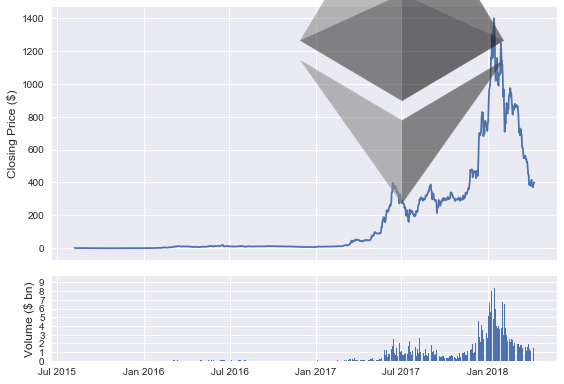

In [4]:

#our first visualization of the Ethereum market: Closing prices and Volume 

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]})
#ax1.set_yscale('log')
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax2.set_ylabel('Volume ($ bn)',fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(eth_market_info['Date'].astype(datetime.datetime),eth_market_info['eth_Open'])
ax2.bar(eth_market_info['Date'].astype(datetime.datetime).values, eth_market_info['eth_Volume'].values)
fig.tight_layout()
fig.figimage(eth_im, 300, 180, zorder=3, alpha=.6)
plt.show()

### The Ethereum market has shown a massive peak in the past months and especially a drop since 2018, feeding the rumors that the crypto markets were all a big bubble! Who was right?

In [5]:
#comparing the Ethereum market with the Bitcoin market 


# importing Bitcoin data
# get market info for bitcoin from the start of 2016 to the current day
bitcoin_market_info = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
bitcoin_market_info = bitcoin_market_info.assign(Date=pd.to_datetime(bitcoin_market_info['Date']))
# when Volume is equal to '-' convert it to 0
bitcoin_market_info.loc[bitcoin_market_info['Volume']=="-",'Volume']=0
# convert to int
bitcoin_market_info['Volume'] = bitcoin_market_info['Volume'].astype('int64')
bitcoin_market_info.columns =[bitcoin_market_info.columns[0]]+['bt_'+i for i in bitcoin_market_info.columns[1:]]


#comparing the two datasets 
market_info = pd.merge(bitcoin_market_info,eth_market_info, on=['Date'])
market_info = market_info[market_info['Date']>='2016-01-01']
for coins in ['bt_', 'eth_']: 
    kwargs = { coins+'day_diff': lambda x: (x[coins+'Close']-x[coins+'Open'])/x[coins+'Open']}
    market_info = market_info.assign(**kwargs)
market_info.head()

Date  bt_Open  bt_High   bt_Low  bt_Close   bt_Volume  bt_Market Cap  \
0 2018-04-10  6795.44  6872.41  6704.15   6834.76  4272750000   115306000000   
1 2018-04-09  7044.32  7178.11  6661.99   6770.73  4894060000   119516000000   
2 2018-04-08  6919.98  7111.56  6919.98   7023.52  3652500000   117392000000   
3 2018-04-07  6630.51  7050.54  6630.51   6911.09  3976610000   112467000000   
4 2018-04-06  6815.96  6857.49  6575.00   6636.32  3766810000   115601000000   

   eth_Open  eth_High  eth_Low  eth_Close  eth_Volume eth_Market Cap  \
0    399.41    415.89   393.88     414.24  1196000000    39430400000   
1    400.86    429.25   390.61     398.53  1478390000    39565100000   
2    385.74    402.59   385.60     400.51   948488000    38065400000   
3    370.38    393.06   369.94     385.31   951475000    36541900000   
4    382.73    385.19   366.91     370.29   967106000    37752600000   

   bt_day_diff  eth_day_diff  
0     0.005786      0.037130  
1    -0.038838     -0.005813  
2     0.014962      0.038290  
3     0.042317      0.040310  
4    -0.026356     -0.032503

In [6]:
market_info.set_index('Date', inplace=True)
market_info.head()

bt_Open  bt_High   bt_Low  bt_Close   bt_Volume  bt_Market Cap  \
Date                                                                         
2018-04-10  6795.44  6872.41  6704.15   6834.76  4272750000   115306000000   
2018-04-09  7044.32  7178.11  6661.99   6770.73  4894060000   119516000000   
2018-04-08  6919.98  7111.56  6919.98   7023.52  3652500000   117392000000   
2018-04-07  6630.51  7050.54  6630.51   6911.09  3976610000   112467000000   
2018-04-06  6815.96  6857.49  6575.00   6636.32  3766810000   115601000000   

            eth_Open  eth_High  eth_Low  eth_Close  eth_Volume eth_Market Cap  \
Date                                                                            
2018-04-10    399.41    415.89   393.88     414.24  1196000000    39430400000   
2018-04-09    400.86    429.25   390.61     398.53  1478390000    39565100000   
2018-04-08    385.74    402.59   385.60     400.51   948488000    38065400000   
2018-04-07    370.38    393.06   369.94     385.31   951475000    36541900000   
2018-04-06    382.73    385.19   366.91     370.29   967106000    37752600000   

            bt_day_diff  eth_day_diff  
Date                                   
2018-04-10     0.005786      0.037130  
2018-04-09    -0.038838     -0.005813  
2018-04-08     0.014962      0.038290  
2018-04-07     0.042317      0.040310  
2018-04-06    -0.026356     -0.032503

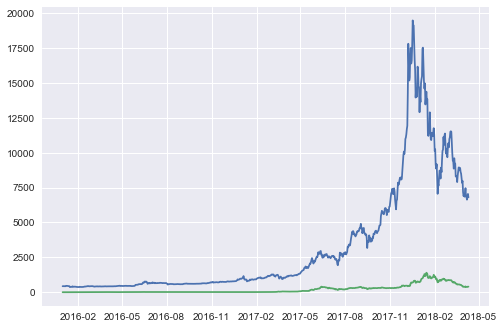

In [7]:
#comparing the evolution of the Opening Price between the Bitcoin and the Ethereum 

y = market_info['bt_Open']
x = market_info.index
y_eth = market_info['eth_Open']

plt.plot(x, y)
plt.plot(x, y_eth)
plt.show()

### This shows us that, while the Ethereum price has increased a lot in the past months, it still represents little compared to the Bitcoin, despite the fact that it is considered as the second cryptocurrency. 

In [8]:
#More explorations: what time range does this dataset cover

print(market_info.index.min())
print(market_info.max())

2016-01-01 00:00:00
bt_Open           1.947580e+04
bt_High           2.008900e+04
bt_Low            1.897410e+04
bt_Close          1.949740e+04
bt_Volume         2.384090e+10
bt_Market Cap     3.261410e+11
eth_Open          1.397480e+03
eth_High          1.432880e+03
eth_Low           1.290600e+03
eth_Close         1.396420e+03
eth_Volume        9.214950e+09
eth_Market Cap    9.997570e+08
bt_day_diff       2.547017e-01
eth_day_diff      3.355556e-01
dtype: float64


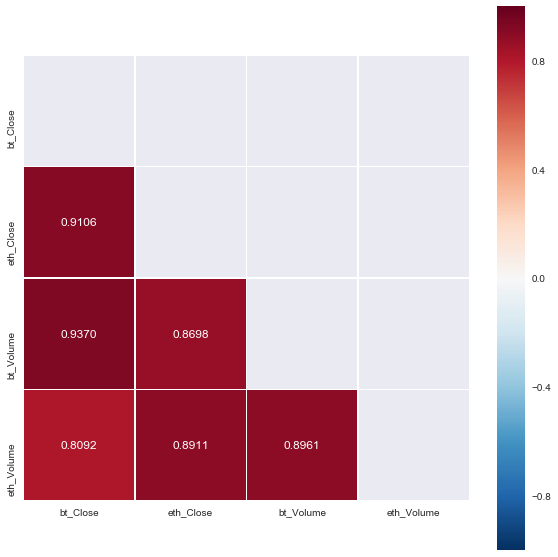

In [9]:
#Matrix correlation 
df = market_info[['bt_Close', 'eth_Close', 'bt_Volume', 'eth_Volume']]

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)
plt.show()

In [10]:
#Let's focus on the most exciting part of this timeframe 
#we might want to go back to the all timeframe later on, so I'll create a new dataset and keept the original one

crypto_2017 = market_info.ix['2018-02-11':'2017-02-11']
print(crypto_2017.index.min())

2017-02-11 00:00:00


/Users/ethelkarskens/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  after removing the cwd from sys.path.


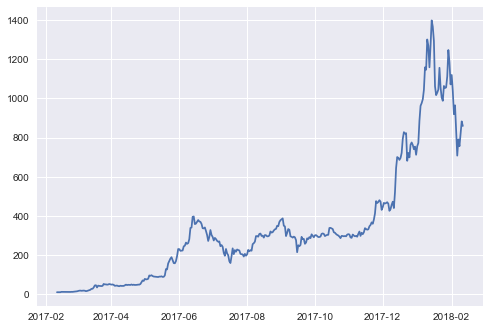

In [11]:
#y = crypto_2017['bt_Open']
y_eth = crypto_2017['eth_Open']
x_eth = crypto_2017.index

#plt.plot(x,y)
plt.plot(x_eth, y_eth)
plt.show()

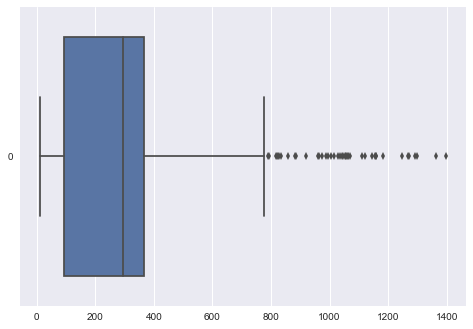

In [12]:
#Lately, the ETH has varied a lot! Let's have another look at these last fluctuations 


ax = sns.boxplot(data=y_eth, orient="h")
plt.show()


The plot above shows that the closing price of Ethereum in the past year was mostly between 100 and 375, approximately. It also shows numerous outliers above 800, which are mostly the consequences of the peaks in crypto of November/December.

## Google Trends

In [13]:
#Exploring other sources of comparison 
#1. Google trends 

import pytrends 
from pytrends.request import TrendReq


pytrends = TrendReq(hl='en-US', tz=360)
kw_list = ["Ethereum"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='', gprop='')

Google_ether = pytrends.interest_over_time()
#note: values represent the % of research comparing to the peak of the time period selected (100, in 10/12)


In [14]:
print(Google_ether)

            Ethereum isPartial
date                          
2017-04-16         6     False
2017-04-23        10     False
2017-04-30        18     False
2017-05-07        14     False
2017-05-14        15     False
2017-05-21        49     False
2017-05-28        39     False
2017-06-04        44     False
2017-06-11        75     False
2017-06-18        57     False
2017-06-25        55     False
2017-07-02        35     False
2017-07-09        41     False
2017-07-16        39     False
2017-07-23        27     False
2017-07-30        26     False
2017-08-06        32     False
2017-08-13        32     False
2017-08-20        28     False
2017-08-27        34     False
2017-09-03        32     False
2017-09-10        28     False
2017-09-17        23     False
2017-09-24        19     False
2017-10-01        18     False
2017-10-08        24     False
2017-10-15        29     False
2017-10-22        24     False
2017-10-29        29     False
2017-11-05        32     False
2017-11-

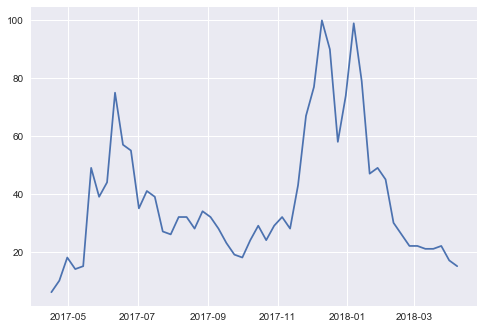

In [15]:
y = Google_ether['Ethereum']
x = Google_ether.index


plt.plot(x,y)

plt.show()

### Interestingly, the last peak in Google trends seems to follow the path of the Ethereum value itself. While it is tempting to use this for further comparison or even predictions, the data provided by this unofficial Google trends API does not give enough details to take this path (at this stage!) 

### two peaks occured in the past 12 months 
One on the 11/06 (76% compared to the largest peak) and the highest on the 10/12 (100%)
The first peak was directly followed by a fall. At that same period of time, a similar trend was also observed for the Ethereum price as well as other popular cryptocurrencies like Bitcoin and Ripple. 
Analysts explained that droped in value by an effect market correction, explaining that the rise right before was a too-rapid growth, creating an unsustainable market overall. 


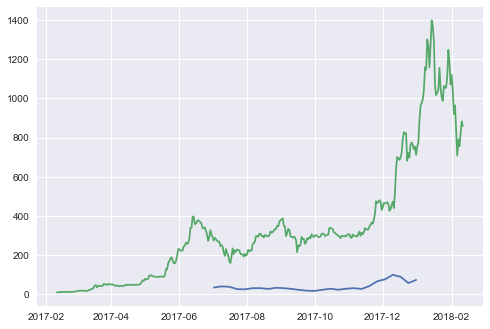

In [16]:
Google_ether_short = Google_ether.loc['2017-07-02':'2017-12-31']
y = Google_ether_short['Ethereum']
x = Google_ether_short.index


plt.plot(x,y)

plt.plot(x_eth, y_eth)
plt.show()

## Time series 

In this part, we will mainly try two things: adding more common time-series analysis to our data and find out if we have stationary data

### Moving Average 
One of the oldest and simplest trading strategies that exist is the one that uses a moving average of the price (or returns) timeseries to proxy the recent trend of the price.

The idea is quite simple, yet powerful; if we use a (say) 100-day moving average of our price time-series, then a significant portion of the daily price noise will have been “averaged-out”. Thus, we can can observe more closely the longer-term behaviour of the asset.

Let us, again, calculate the rolling simple moving averages (SMA) of these three timeseries as follows. Remember, again, that when calculating the MM days SMA, the first M−1M−1 are not valid, as MM prices are required for the first moving average data point.

/Users/ethelkarskens/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ethelkarskens/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  after removing the cwd from sys.path.


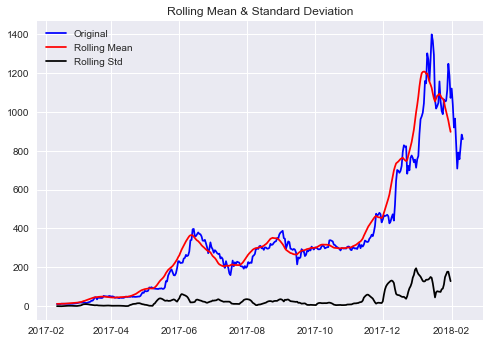

In [17]:
#Ethereum values are not stationary, less make some rolling averages! 

rollmean = pd.rolling_mean(y_eth, window=12)
rollstd = pd.rolling_std(y_eth, window=12)
plt.plot(y_eth, color='blue',label='Original')
plt.plot(rollmean, color='red', label='Rolling Mean')
plt.plot(rollstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

There are three lines above: The origignal one (blue) that has dropped since January 2018; the red line that represents the rolling average and shows a more stable price fluctuation and the standard deviation in black, at the bottom of the chart. 
### Because these is no constant over time, 
it means that there are high chances that our data are not stationary. 
But less not assume too much with a simple visualisation! 

### Here is another way to test our stationary assumption: 
The Dickey-Fuller test! This will test the null hypothesis that the data is not stationary. We will go for a 95% confidence interval

In [18]:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test for Raw Low Data:')
dftest = adfuller(y_eth, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-   value','#Lags Used','Number of Observations Used'])
print(dfoutput)
print('Critical Value at 5%', list(dftest[4].items())[1][1])

Results of Dickey-Fuller Test for Raw Low Data:
Test Statistic                  -2.170878
p-   value                       0.216984
#Lags Used                      17.000000
Number of Observations Used    348.000000
dtype: float64
Critical Value at 5% -2.86988137153


/Users/ethelkarskens/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


We cannot reject the null hypothesis, meaning that we need to do additional transformations to make it stationary. 

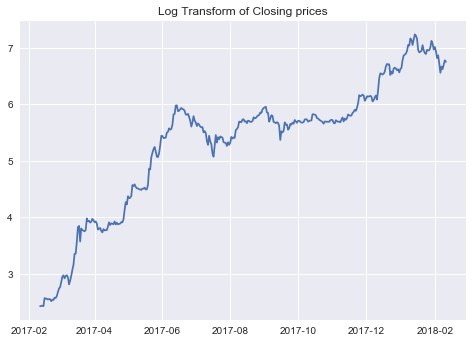

In [19]:
log_eth = np.log(y_eth)
plt.plot(log_eth)
plt.title('Log Transform of Closing prices')
plt.show()


In [20]:
print('Results of Dickey-Fuller Test for Log Transform of Closing prices:')
dftest = adfuller(log_eth, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)
print('Critical Value at 5%', list(dftest[4].items())[1][1])

Results of Dickey-Fuller Test for Log Transform of Closing prices:
Test Statistic                   1.334119
p-value                          0.996793
#Lags Used                       0.000000
Number of Observations Used    365.000000
dtype: float64
Critical Value at 5% -2.86949123437


Again, the null hypothesis cannot be rejected with a confidence level of 95%. 
Let's try 
### an exponential weighted moving average on our log transform ! 

/Users/ethelkarskens/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


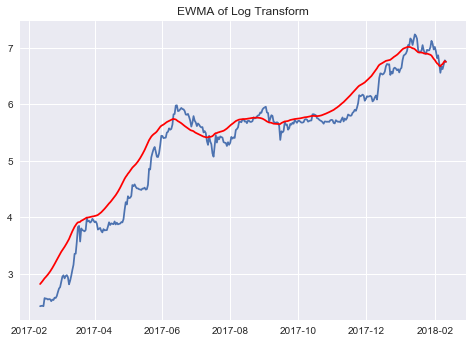

In [21]:
expwighted_avg = pd.ewma(log_eth, halflife=12)
plt.plot(log_eth)
plt.plot(expwighted_avg, color='red')
plt.title('EWMA of Log Transform')
plt.show()

In [22]:
print('Results of Dickey-Fuller Test for Difference of Log Transform and EWMA:')
dftest = adfuller(expwighted_avg, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)
print('Critical Value at 5%', list(dftest[4].items())[1][1])

Results of Dickey-Fuller Test for Difference of Log Transform and EWMA:
Test Statistic                   1.065955
p-value                          0.994915
#Lags Used                       1.000000
Number of Observations Used    364.000000
dtype: float64
Critical Value at 5% -2.86951317051


Our data is officially not statioanry! 

### What would be the next steps? 

* Testing predictions with Algorithms like Prophet, that should be easily applied to data like this 
* Testing Tensorflow in that context too
* Making a comparion with other less known cryptocurrencies. One of my assumptions regarding the high volatily of the Ethereum being that these is a lot of noise in its investments, as high volume of transactions come from investors less 

# Conclusion 

## Ethereum values did follow the Bitcoin trends
 But cannot be comparable in terms if prices and volume 
 
## Google Trends could be a source of support for predictions 
But there is not enough data at this stage and be aware of correlation vs. causation! 

## Our Data (Ethereum closing prices) were not stationary 
But there might be further modifications to be made in order to achieve that point 

